### 1. Import Necessary Libraries

In [2]:
### 1. Import Necessary Libraries
import pandas as pd
import numpy as np

### 2. Load the Data

In [3]:
cleaned_survey_df = pd.read_csv('../data/cleaned_survey_data.csv')

### 3. Inspect the Data

In [4]:
cleaned_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        62 non-null     object
 1   General_Health                62 non-null     object
 2   Exercise_Duration             62 non-null     object
 3   Aerobic_Exercise_Intensity    62 non-null     object
 4   Aerobic_Exercise_Frequency    62 non-null     object
 5   Aerobic_Exercise_Duration     62 non-null     object
 6   Anaerobic_Exercise_Intensity  62 non-null     object
 7   Anaerobic_Exercise_Frequency  62 non-null     object
 8   Anaerobic_Exercise_Duration   62 non-null     object
 9   Sleep_Quality                 62 non-null     object
 10  Academic_Workload             62 non-null     object
 11  Overwhelmed_By_Workload       62 non-null     object
 12  Exercise_Challenges           62 non-null     object
 13  Exercise_Prioritizatio

### 4. Data analysis 

In [5]:
cleaned_survey_df

,Gender,General_Health,Exercise_Duration,Aerobic_Exercise_Intensity,Aerobic_Exercise_Frequency,Aerobic_Exercise_Duration,Anaerobic_Exercise_Intensity,Anaerobic_Exercise_Frequency,Anaerobic_Exercise_Duration,Sleep_Quality,Academic_Workload,Overwhelmed_By_Workload,Exercise_Challenges,Exercise_Prioritization,Depression,Anxiety,Stress
0,Male,Very good,Less than 6 months,"Light (Light stretching, yoga)",1-2 times per week,Less than 30 minutes,"Moderate (Brisk walking, Steady cycling)",1-2 times per week,Less than 30 minutes,Good,High,Rarely,Lack of motivation,Very likely,Extremely Severe,Extremely Severe,Severe
1,Male,Very good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",3-5 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per week,Less than 30 minutes,Fair,Moderate,Sometimes,Academic commitments,Somewhat likely,Severe,Extremely Severe,Severe
2,Male,Good,Less than 6 months,"Light (Light stretching, yoga)",Less than once per month,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",Less than once per month,Less than 30 minutes,Poor,Very High,Often,Lack of motivation,Somewhat unlikely,Moderate,Severe,Extremely Severe
3,Male,Very good,6 months - 1 year,"Light (Light stretching, yoga)",1-2 times per week,30 - 60 minutes,"Light (Light weightlifting, yoga, Pilates)",Daily,Less than 30 minutes,Good,High,Sometimes,Lack of time,Somewhat likely,Extremely Severe,Extremely Severe,Moderate
4,Male,Fair,More than 2 years,"Light (Light stretching, yoga)",Daily,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",Daily,Less than 30 minutes,Fair,High,Often,Lack of motivation,Neutral,Extremely Severe,Extremely Severe,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Female,Very good,1-2 years,"Moderate (Brisk walking, Steady cycling)",Less than once per month,30 - 60 minutes,"Light (Light weightlifting, yoga, Pilates)",Less than once per month,30 - 60 minutes,Good,High,Often,Lack of time,Somewhat likely,Mild,Moderate,Normal
58,Male,Very good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",1-2 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per week,30 - 60 minutes,Poor,High,Often,Lack of time,Neutral,Mild,Normal,Mild
59,Female,Good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",3-5 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",3-5 times per week,Less than 30 minutes,Fair,High,Often,No access to facilities,Neutral,Moderate,Extremely Severe,Mild
60,Female,Good,Less than 6 months,"Moderate (Brisk walking, Steady cycling)",1-2 times per month,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per month,Less than 30 minutes,Fair,Moderate,Sometimes,Lack of motivation,Neutral,Severe,Extremely Severe,Severe


## Data Analysis

### 1. Identify the Most Common Type of Physical Exercise

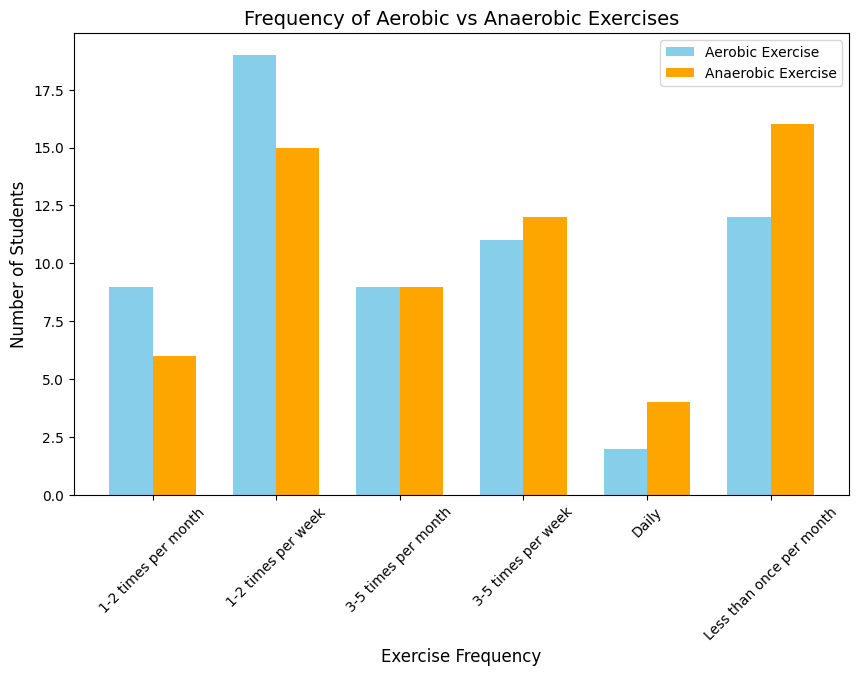

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of aerobic and anaerobic exercise engagement
aerobic_freq = cleaned_survey_df['Aerobic_Exercise_Frequency'].value_counts()
anaerobic_freq = cleaned_survey_df['Anaerobic_Exercise_Frequency'].value_counts()

# Align the frequency indices (to have same categories)
categories = sorted(set(aerobic_freq.index).union(set(anaerobic_freq.index)))
aerobic_freq = aerobic_freq.reindex(categories, fill_value=0)
anaerobic_freq = anaerobic_freq.reindex(categories, fill_value=0)

# Plot the frequencies as side-by-side bars
width = 0.35  # Bar width
x = range(len(categories))

# Create figure and axis objects
plt.figure(figsize=(10, 6))

# Plotting aerobic exercise bars
plt.bar(x, aerobic_freq, width=width, color='skyblue', label='Aerobic Exercise')

# Plotting anaerobic exercise bars, offset by 'width'
plt.bar([p + width for p in x], anaerobic_freq, width=width, color='orange', label='Anaerobic Exercise')

# Set chart title and labels
plt.title('Frequency of Aerobic vs Anaerobic Exercises', fontsize=14)
plt.xlabel('Exercise Frequency', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks([p + width / 2 for p in x], categories, rotation=45)  # Position x-ticks in the middle of the bars
plt.legend()

# Display the plot
plt.show()

### 2. Correlation Between Aerobic Exercise Activity Level and Mental Health

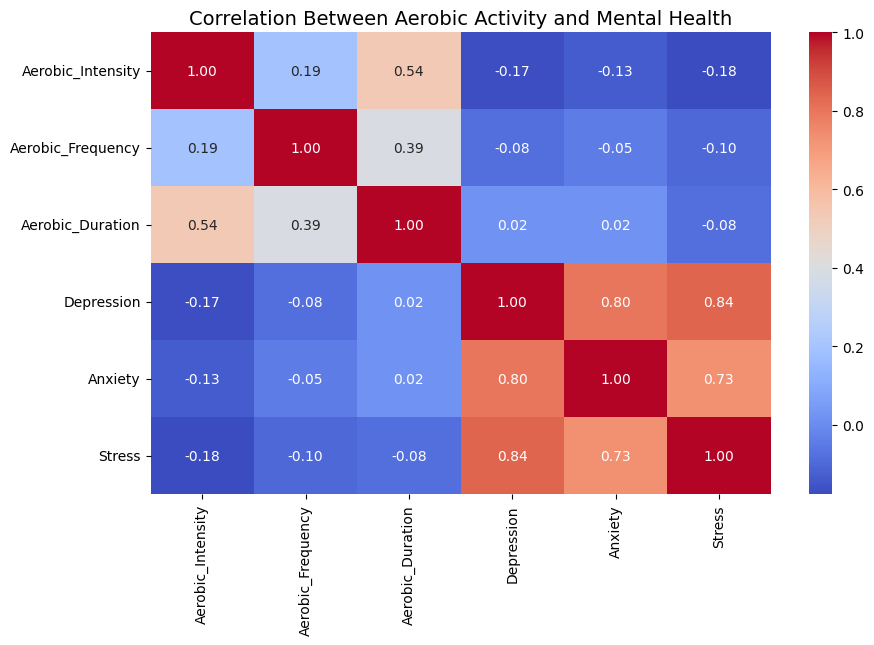

In [9]:
# Encode categorical data for correlation
cleaned_survey_df['Aerobic_Intensity'] = cleaned_survey_df['Aerobic_Exercise_Intensity'].map({'Light (Light stretching, yoga)': 1, 
                                                                    'Moderate (Brisk walking, Steady cycling)': 2, 
                                                                    'Vigorous (Running, HIIT)': 3})
cleaned_survey_df['Aerobic_Frequency'] = cleaned_survey_df['Aerobic_Exercise_Frequency'].map({'Less than once per month': 1, 
                                                                    '1-2 times per week': 2, 
                                                                    '3-5 times per week': 3, 
                                                                    'Daily': 4})
cleaned_survey_df['Aerobic_Duration'] = cleaned_survey_df['Aerobic_Exercise_Duration'].map({'Less than 30 minutes': 1, 
                                                                  '30 - 60 minutes': 2, 
                                                                  'More than 60 minutes': 3})

# Select relevant mental health columns
mental_health_cols = ['Depression', 'Anxiety', 'Stress']
mental_health_encoded = cleaned_survey_df[mental_health_cols].replace({'Normal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Extremely Severe': 4})

# Correlation matrix
aerobic_data = cleaned_survey_df[['Aerobic_Intensity', 'Aerobic_Frequency', 'Aerobic_Duration']]
correlation = aerobic_data.join(mental_health_encoded).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Aerobic Activity and Mental Health', fontsize=14)
plt.show()

### 3. Correlation Between Anaerobic Exercise Activity Level and Mental Health

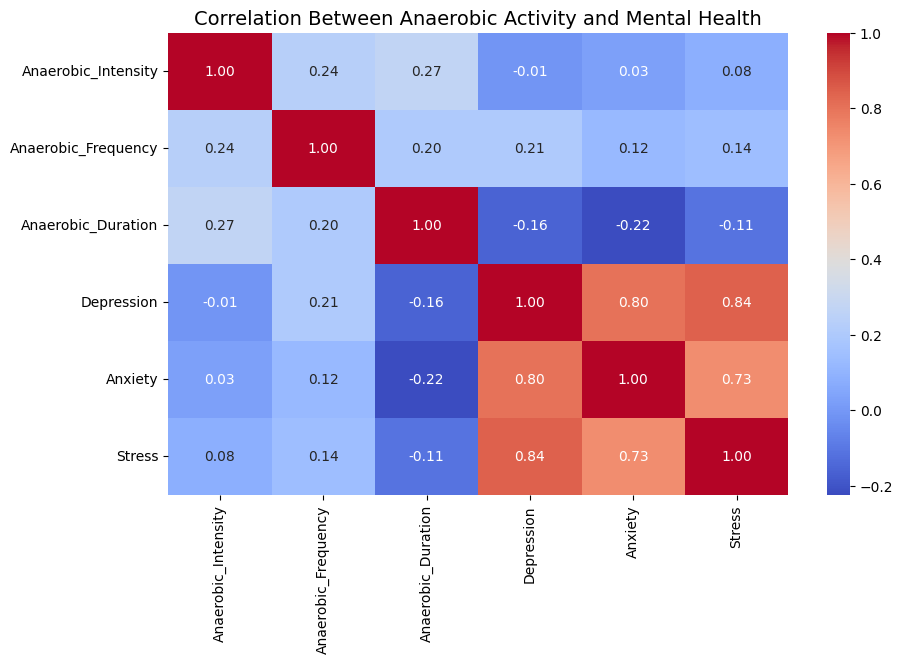

In [10]:
# Encode anaerobic data
cleaned_survey_df['Anaerobic_Intensity'] = cleaned_survey_df['Anaerobic_Exercise_Intensity'].map({'Light (Light weightlifting, yoga, Pilates)': 1, 
                                                                        'Moderate (Moderate weightlifting, circuit training)': 2, 
                                                                        'Vigorous (Heavy weightlifting, CrossFit)': 3})
cleaned_survey_df['Anaerobic_Frequency'] = cleaned_survey_df['Anaerobic_Exercise_Frequency'].map({'Less than once per month': 1, 
                                                                        '1-2 times per week': 2, 
                                                                        '3-5 times per week': 3, 
                                                                        'Daily': 4})
cleaned_survey_df['Anaerobic_Duration'] = cleaned_survey_df['Anaerobic_Exercise_Duration'].map({'Less than 30 minutes': 1, 
                                                                      '30 - 60 minutes': 2, 
                                                                      'More than 60 minutes': 3})

# Correlation matrix
anaerobic_data = cleaned_survey_df[['Anaerobic_Intensity', 'Anaerobic_Frequency', 'Anaerobic_Duration']]
correlation_anaerobic = anaerobic_data.join(mental_health_encoded).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_anaerobic, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Anaerobic Activity and Mental Health', fontsize=14)
plt.show()

### 4. Identify the More Effective Exercise Type for Mental Health

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11760\4189097432.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='viridis')


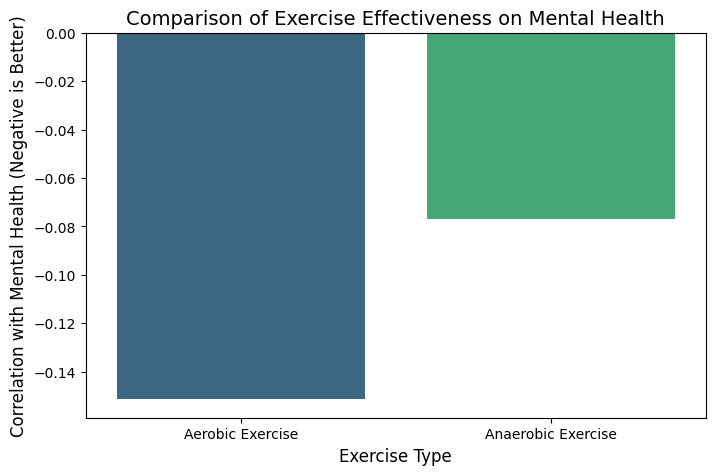

In [11]:
# Aggregate mental health scores for each exercise type
aerobic_effectiveness = aerobic_data.sum(axis=1).corr(mental_health_encoded.mean(axis=1))
anaerobic_effectiveness = anaerobic_data.sum(axis=1).corr(mental_health_encoded.mean(axis=1))

# Plot the comparison
labels = ['Aerobic Exercise', 'Anaerobic Exercise']
scores = [aerobic_effectiveness, anaerobic_effectiveness]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, palette='viridis')
plt.title('Comparison of Exercise Effectiveness on Mental Health', fontsize=14)
plt.ylabel('Correlation with Mental Health (Negative is Better)', fontsize=12)
plt.xlabel('Exercise Type', fontsize=12)
plt.show()
